In [1]:
import pymks
import numpy as np
from PIL import Image
from Scripts import SpatialCorrelations as corr
import matplotlib.pyplot as plt
import pandas as pd
import os
from Scripts import velocityCalculations as vel


In [2]:
path = '/Users/adithyaiyer/Desktop/DDP/Datasets/TimeSeries/'
list_files = os.listdir(path)
list_files.sort()
j = 0
for i in list_files:
    list_files[j] = path+i
    j = j+1


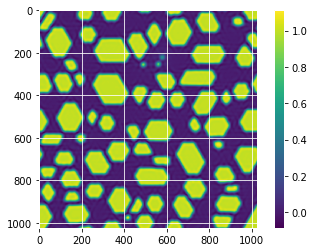

419430.644825609


In [3]:
img_ = corr.dat_to_numpy(list_files[180])
plt.imshow(img_)
plt.colorbar()
plt.show()
print(np.sum(img_))

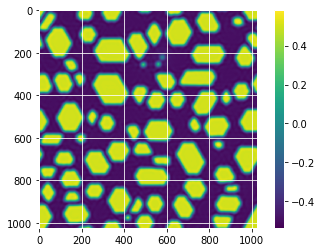

In [4]:
plt.imshow(vel.image_preprocessing(img_))
plt.colorbar()

In [5]:
velocity_mag = vel.velocityMagnitude(list_files, 180, 2)

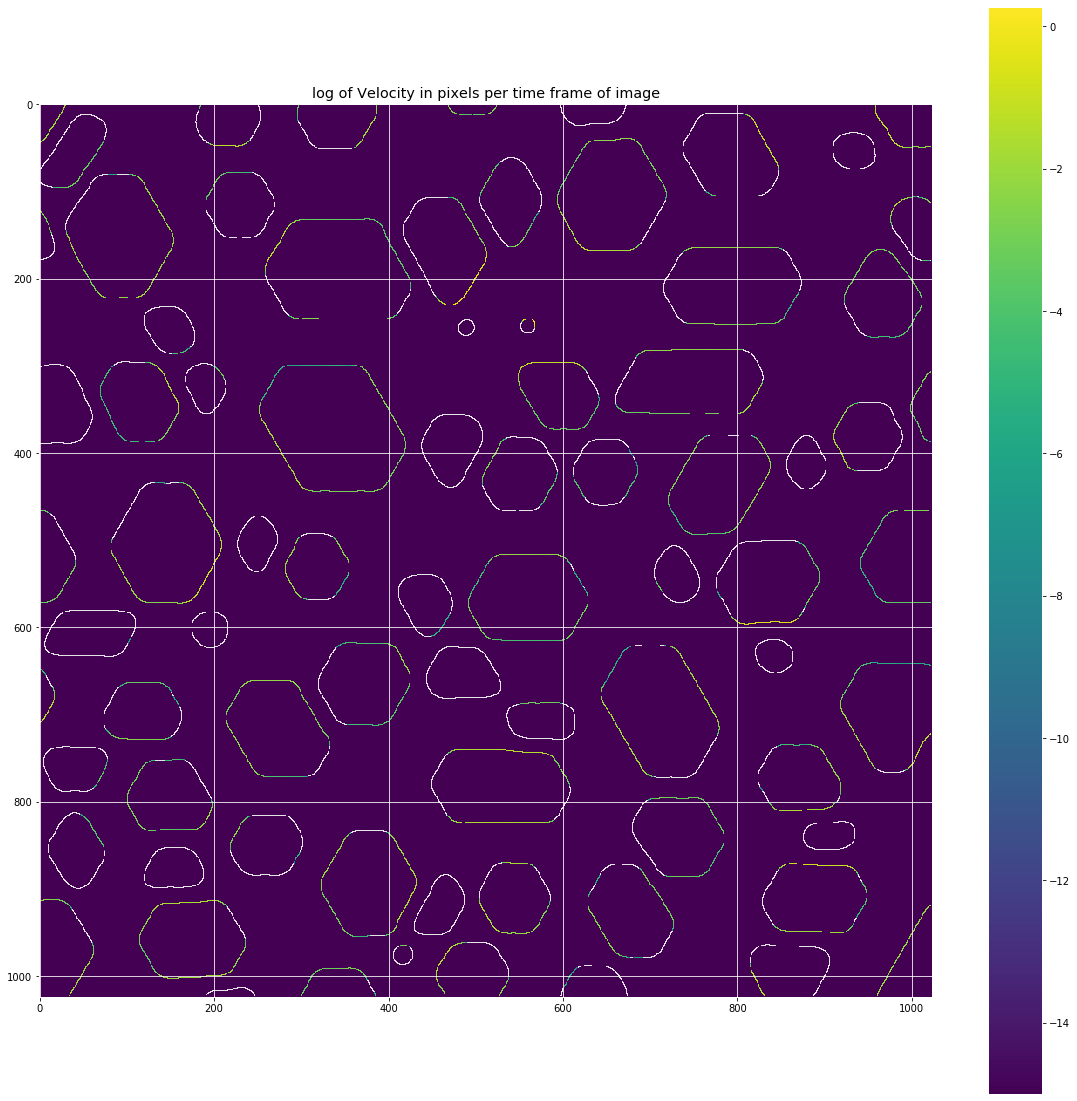

In [6]:

a = np.log(velocity_mag)
a[np.isneginf(a)] = -15
a[np.isinf(a)] = -15
plt.rcParams["figure.figsize"] = (20,20)
plt.title('log of Velocity in pixels per time frame of image')
plt.imshow(a)
plt.colorbar()

In [7]:
a[np.isneginf(a)] = -15
a[np.isinf(a)] = -15
listy =(a.flatten().tolist())
A =[]
for i in listy:
    if i!=-15:
        A.append(i)



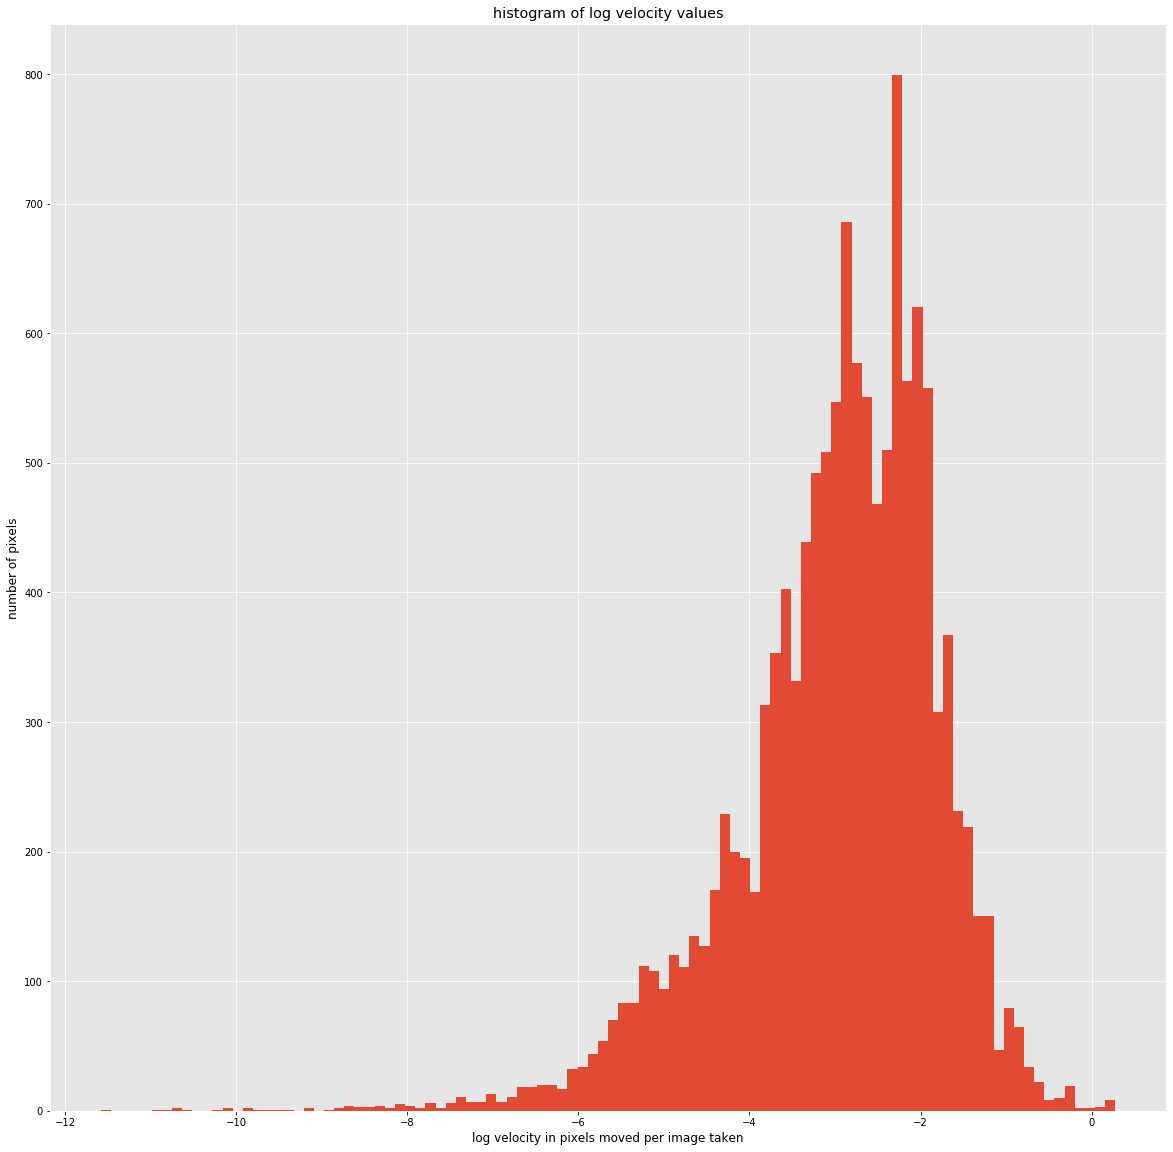

In [13]:
x =plt.hist(A, bins = 100) 
plt.title("histogram of log velocity values") 
plt.xlabel('log velocity in pixels moved per image taken')
plt.ylabel('number of pixels')
plt.show()

In [14]:
velocity_direction = vel.velocityDirection(list_files, 180, 2)

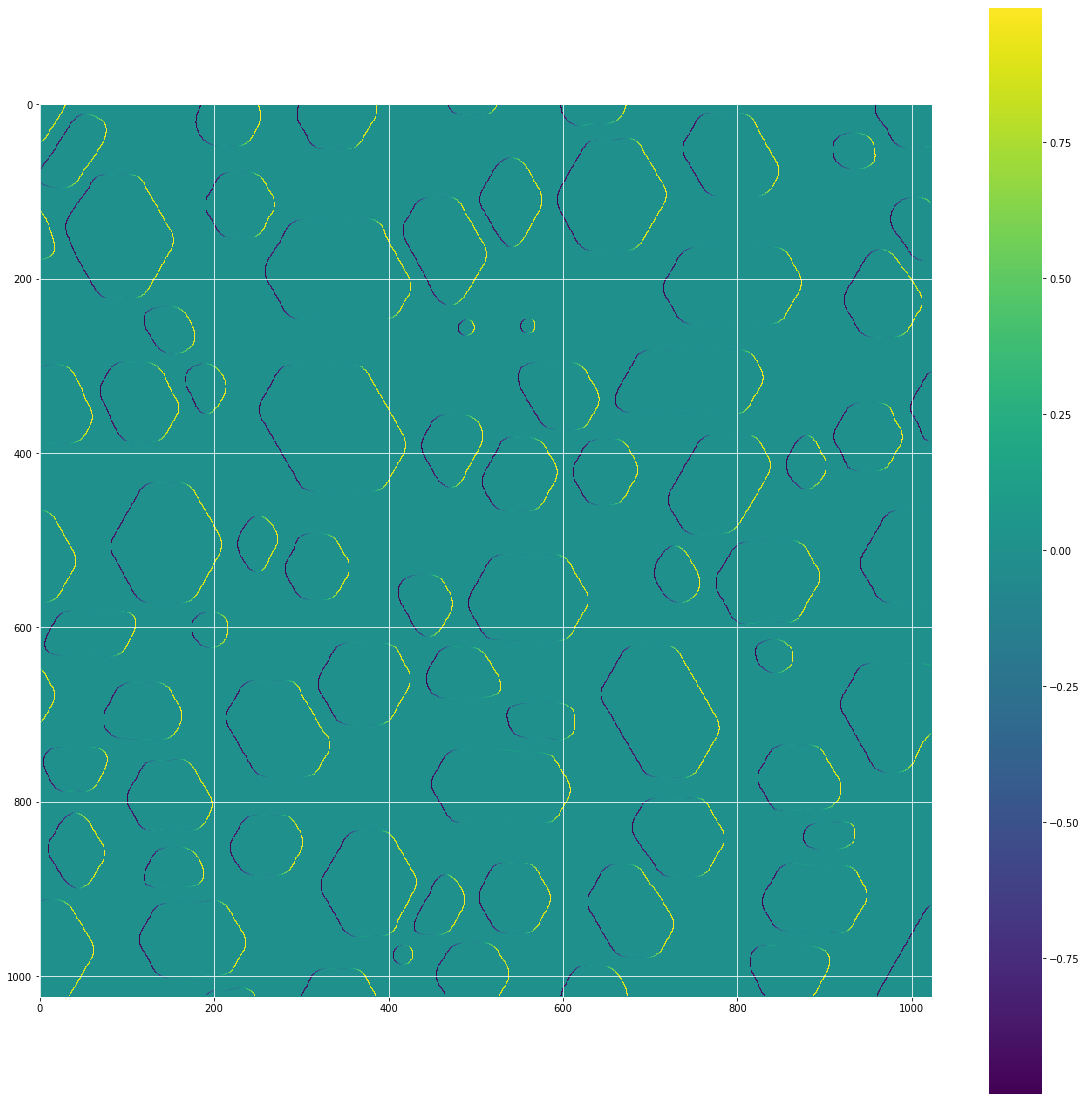

In [15]:
plt.imshow(velocity_direction[1])
plt.colorbar()

In [24]:
a =np.array([1,3,-4,5])
np.sign(a)

array([ 1,  1, -1,  1])

In [8]:
velocity = vel.velocityMagnitude(list_files, 180, 2)
velocity1 = vel.velocityDirection(list_files, 180, 2)

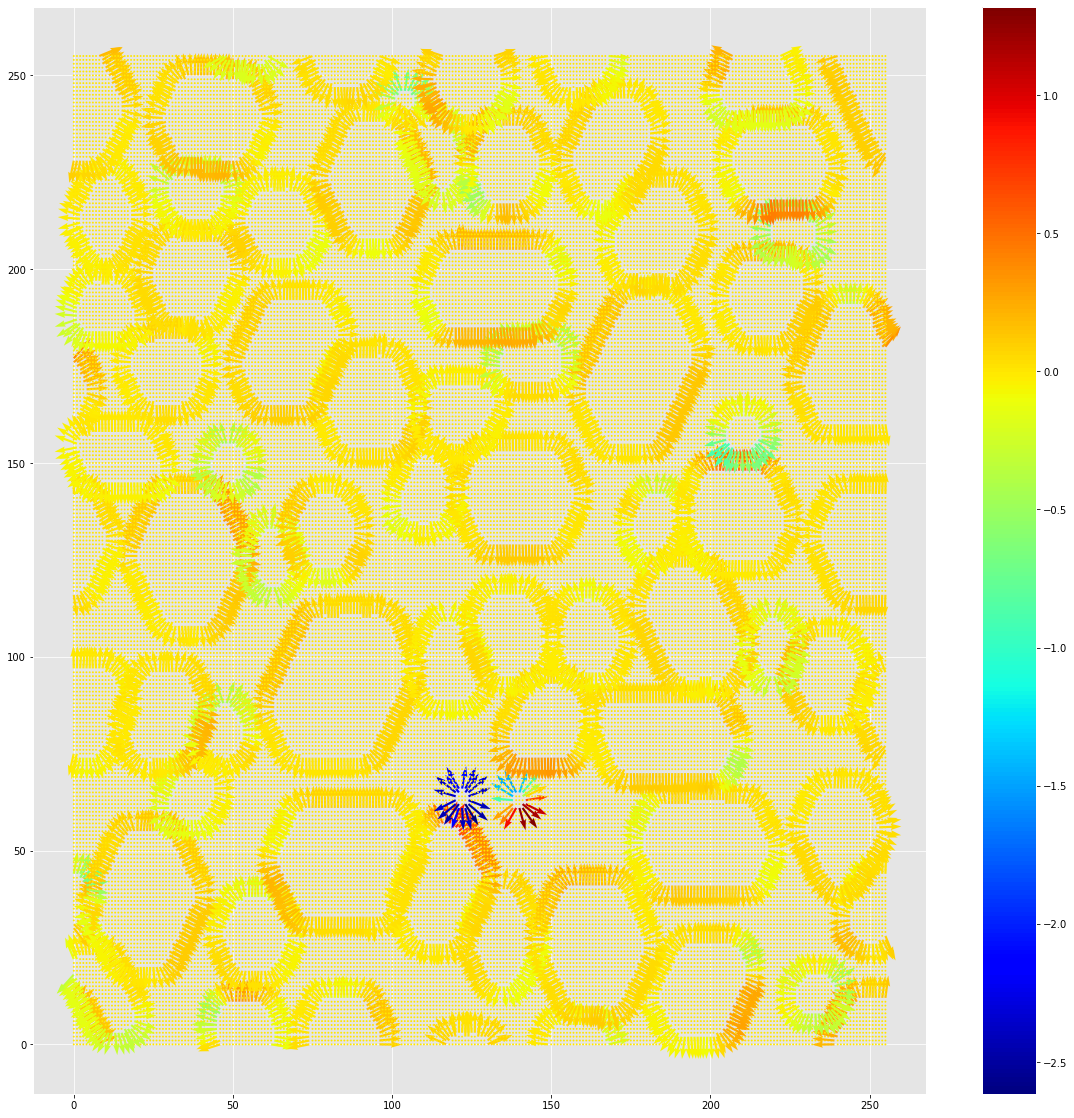

In [9]:
x = np.zeros((256,256))
y = np.zeros((256,256))
M = np.zeros((256,256))           
for i in range(0,256):
    for j in range(0,256):
        if np.max(velocity1[0][i*4:(i+1)*4,j*4:(j+1)*4])==0.0:
            x[i][j] = np.min(velocity1[0][i*4:(i+1)*4,j*4:(j+1)*4])
        else:
            x[i][j] = np.max(velocity1[0][i*4:(i+1)*4,j*4:(j+1)*4])
        if np.max(velocity1[1][i*4:(i+1)*4,j*4:(j+1)*4])==0.0:
            y[i][j] = np.min(velocity1[1][i*4:(i+1)*4,j*4:(j+1)*4])
        else:
            y[i][j] = np.max(velocity1[1][i*4:(i+1)*4,j*4:(j+1)*4])   


for i in range(0,256):
    for j in range(0,256):
        if np.max(velocity[i*4:(i+1)*4,j*4:(j+1)*4])==0.0:
            M[i][j] = np.min(velocity[i*4:(i+1)*4,j*4:(j+1)*4])
        else:
            M[i][j] = np.max(velocity[i*4:(i+1)*4,j*4:(j+1)*4])
Fx = y
Fy = x
x_ = np.arange(0,256)
y_ = np.arange(0,256)
        
X, Y = np.meshgrid(x_,y_)

#plt.axes([0.065, 0.065, 0.9, 0.9])
plt.rcParams["figure.figsize"] = (20,20)
qq =plt.quiver(X, Y, Fx, Fy,M,scale = 40,cmap=plt.cm.jet)
plt.colorbar(qq,cmap=plt.cm.jet)

plt.show()

        

In [100]:
a = (np.log(velocity_mag))
a[np.isinf(a)] = -15
a = a+10
velocity_value_x = a*velocity_direction[0]
velocity_value_y = a*velocity_direction[1]

In [101]:
x = np.zeros((128,128))
y = np.zeros((128,128))
             
for i in range(0,128):
    for j in range(0,128):
        if np.max(velocity_value_x[i*8:(i+1)*8,j*8:(j+1)*8])==0.0:
            x[i][j] = np.min(velocity_value_x[i*8:(i+1)*8,j*8:(j+1)*8])
        else:
            x[i][j] = np.max(velocity_value_x[i*8:(i+1)*8,j*8:(j+1)*8])
        if np.max(velocity_value_y[i*8:(i+1)*8,j*8:(j+1)*8])==0.0:
            y[i][j] = np.min(velocity_value_y[i*8:(i+1)*8,j*8:(j+1)*8])
        else:
            y[i][j] = np.max(velocity_value_y[i*8:(i+1)*8,j*8:(j+1)*8])

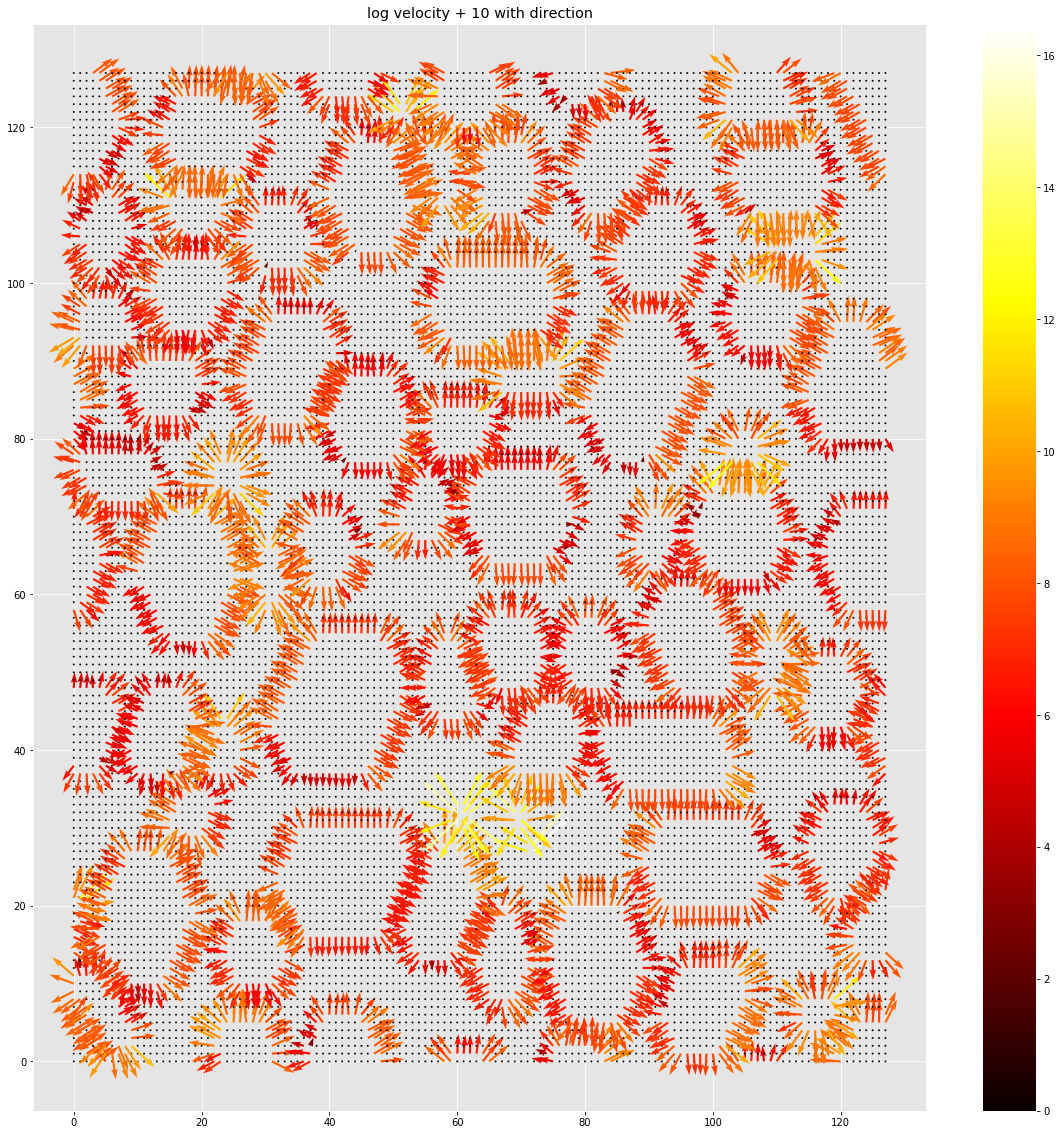

In [105]:
Fx = y
Fy = x
x_ = np.arange(0,128)
y_ = np.arange(0,128)

M = np.sqrt(x*x+y*y)
X, Y = np.meshgrid(x_,y_)

#plt.axes([0.065, 0.065, 0.9, 0.9])
plt.quiver(X, Y, Fx, Fy,M,scale = 300,cmap=plt.cm.hot)
plt.colorbar()
plt.title('log velocity + 10 with direction')
#plt.rcParams["figure.figsize"] = (1,)
plt.show()

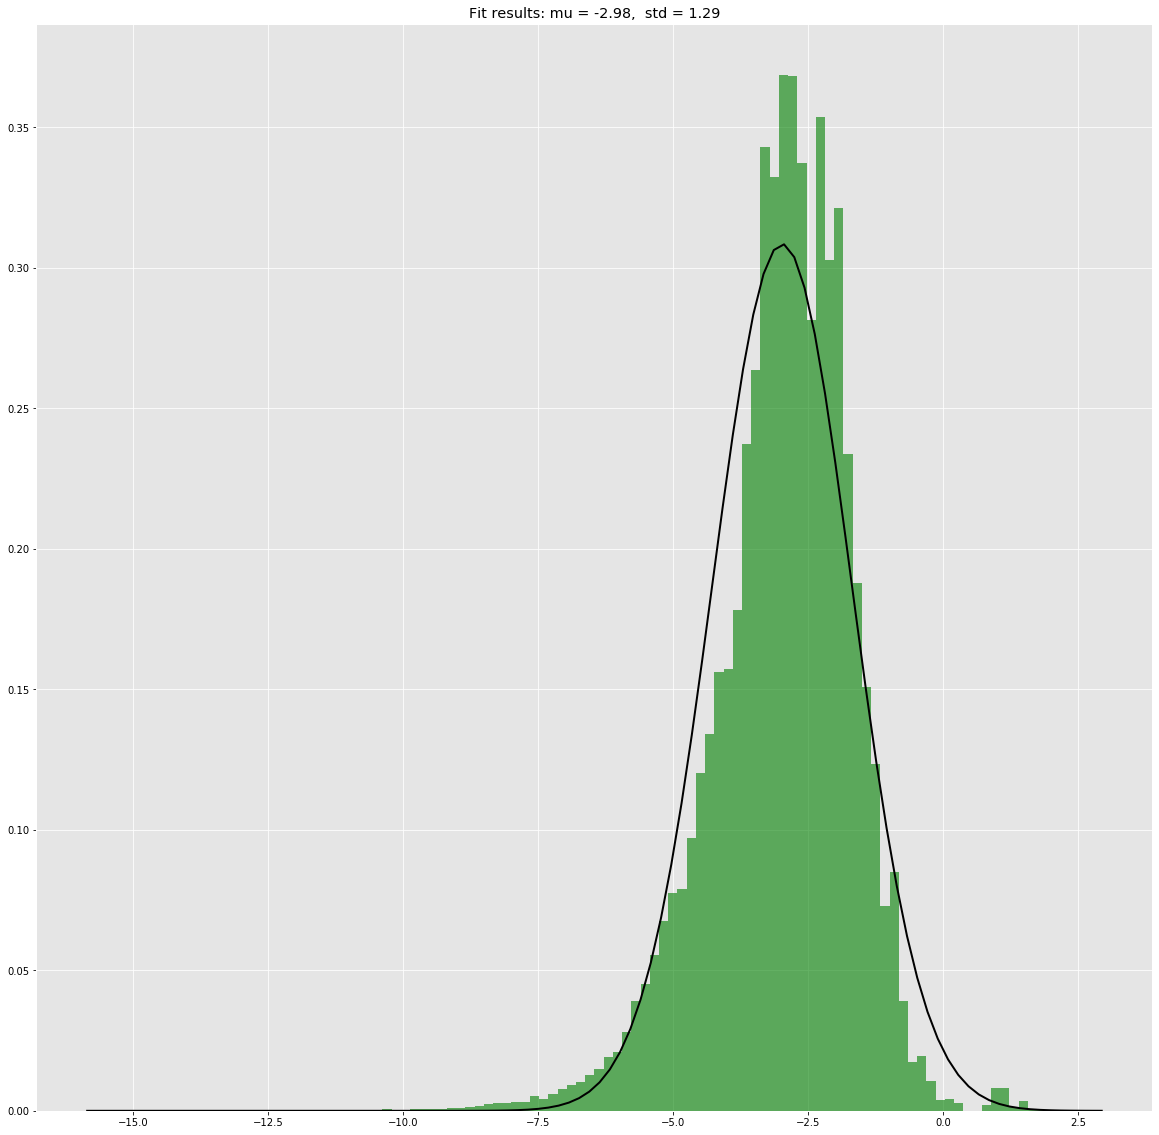

In [110]:
# Fit a normal distribution to the data:
mu, std = norm.fit(A)

# Plot the histogram.
plt.hist(A, bins=100, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [111]:
from scipy.stats import t

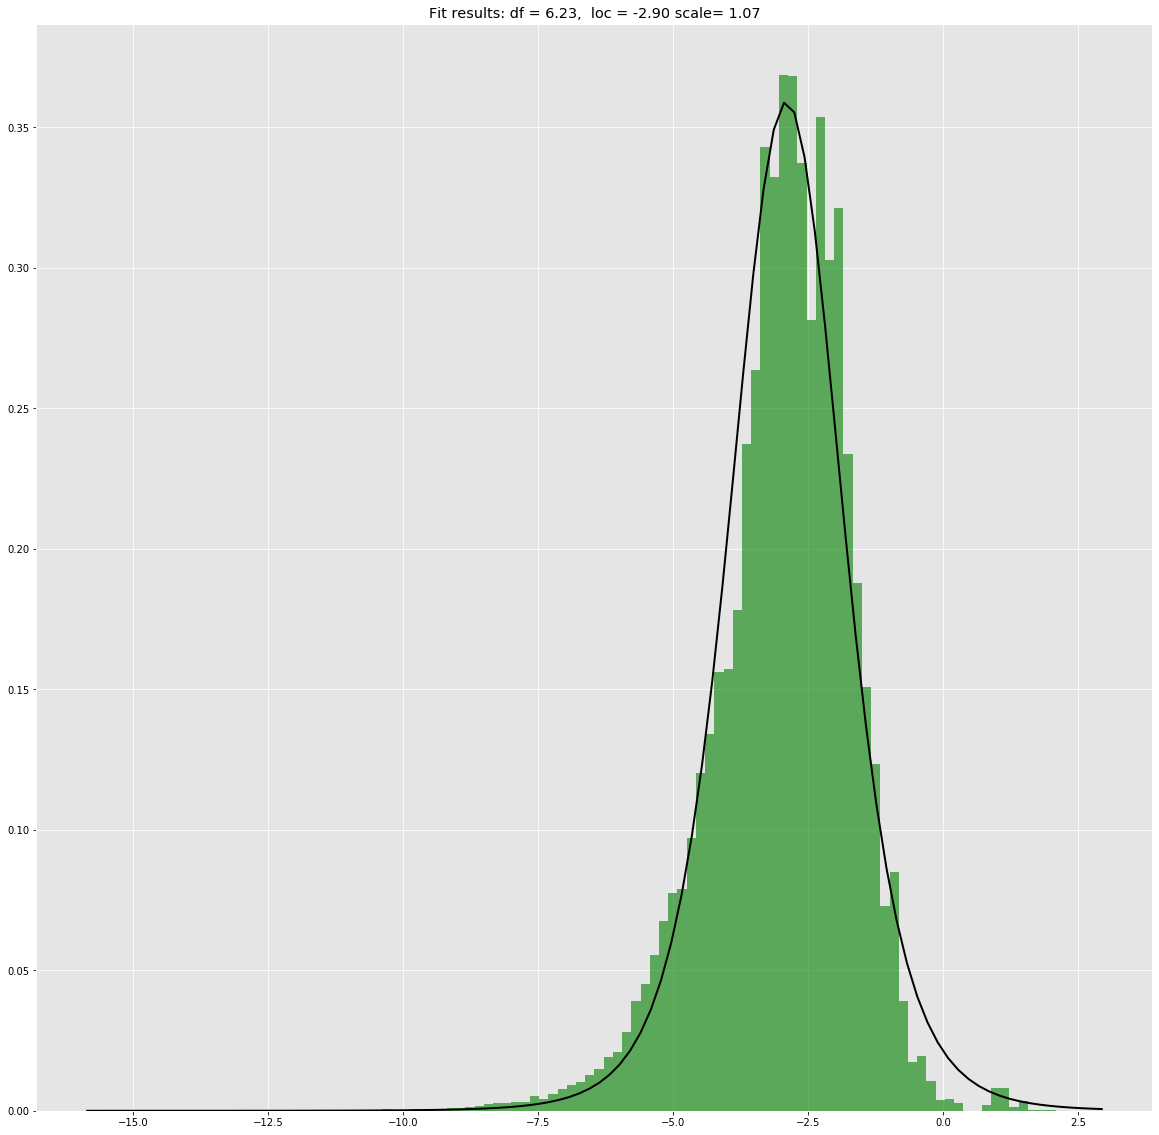

In [114]:
df, loc, scale = t.fit(A)

# Plot the histogram.
plt.hist(A, bins=100, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = t.pdf(x, df, loc, scale)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: df = %.2f,  loc = %.2f scale= %.2f" % (df, loc, scale)
plt.title(title)

plt.show()